In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as st

In [2]:
df = pd.read_csv("drive_results.csv")
df.head()

,Unnamed: 0,team,result,details,drive_start,game_id
0,0,buf,FIELD GOAL,"4 PLAYS, 5 YARDS, 1:30",1st & 10 at PIT 24,401326308
1,1,pit,PUNT,"5 PLAYS, 22 YARDS, 2:55",1st & 10 at PIT 25,401326308
2,2,buf,PUNT,"10 PLAYS, 33 YARDS, 5:30",1st & 10 at BUF 12,401326308
3,3,pit,PUNT,"3 PLAYS, -7 YARDS, 1:15",1st & 10 at PIT 20,401326308
4,4,buf,PUNT,"3 PLAYS, 9 YARDS, 1:09",1st & 10 at BUF 37,401326308


In [3]:
df["number_plays"] = df["details"].apply(lambda x: int(x.split(" ")[0]))
df["yards"] = df["details"].apply(lambda x: int(x.split(" ")[2]))
df["time_of_possesion"] = df["details"].apply(lambda x: x.split(" ")[-1])

print(df["number_plays"].unique())
print(df["yards"].unique())
print(df["time_of_possesion"].unique())


[ 4  5 10  3  6  7 13  1 12 11  8  9  2 14 18 15  0 16 17 19 20]
[  5  22  33  -7   9  25  34  -2  -8   0  91  -1  69  40  62  27  52  67
  48  -3  16 -13  17  76  42  29  32  57   2   6  70  11  93  12   8  84
  38  55  75  54   3   1  68   7  19  85  45 -15  -6  47  23  18  36  15
  46  65  81  39  30  72  80 -11  63  -5  41  20  71  37  87  28 -10  13
  31  74  10   4  50  14  60  24  59  82  78  44  86  -4  61  83  21  73
  49  66  94  64  35  92  77  90  56  79  43  53 -14  26 -16  97  58 -12
  -9  88  51  89  95 -17  96  98 -18  99]
['1:30' '2:55' '5:30' '1:15' '1:09' '3:40' '3:03' '1:26' '0:54' '2:37'
 '5:39' '0:22' '4:37' '4:35' '4:01' '3:05' '2:23' '1:34' '4:22' '2:41'
 '1:56' '0:46' '3:36' '2:26' '1:20' '3:01' '3:27' '4:40' '2:04' '2:00'
 '3:12' '0:08' '1:31' '0:35' '1:40' '1:42' '2:15' '2:20' '0:58' '7:43'
 '2:33' '2:31' '0:49' '0:30' '7:02' '2:14' '5:05' '4:13' '3:25' '1:21'
 '1:04' '1:18' '0:29' '3:52' '1:39' '4:44' '1:36' '1:33' '0:26' '2:53'
 '2:17' '1:58' '2:18' '2:45' 

In [4]:
df.head()
print(df[df["drive_start"].isna()])
print(len(df))

      Unnamed: 0 team       result                   details drive_start  \
159          159  atl  END OF HALF    0 PLAYS, 0 YARDS, 0:02         NaN   
211          211  det  END OF HALF    0 PLAYS, 0 YARDS, 0:03         NaN   
334          334  dal  END OF GAME    1 PLAY, 11 YARDS, 0:02         NaN   
408          408   tb         PUNT   8 PLAYS, 20 YARDS, 3:11         NaN   
512          512  pit  END OF HALF    0 PLAYS, 0 YARDS, 0:02         NaN   
624          624   kc  END OF HALF    0 PLAYS, 0 YARDS, 0:03         NaN   
1240        1240   sf       FUMBLE    0 PLAYS, 0 YARDS, 0:06         NaN   
1283        1283  pit  END OF HALF    0 PLAYS, 0 YARDS, 0:05         NaN   
1427        1427  hou  END OF HALF    0 PLAYS, 0 YARDS, 0:02         NaN   
1505        1505   tb   FIELD GOAL  10 PLAYS, 51 YARDS, 4:10         NaN   
1633        1633   kc       FUMBLE    0 PLAYS, 0 YARDS, 0:07         NaN   
1642        1642  buf  END OF HALF    0 PLAYS, 0 YARDS, 0:02         NaN   
1998        

In [5]:
df = df.dropna()
df = df[df.drive_start.str.startswith("1")]
def yardsAwayFromDetails(drive_start, team):
    lst = drive_start.split()
    if(team.lower() == lst[-2].lower()):
        return 100 - int(lst[-1])
    else:
        return int(lst[-1])
for i in df.drive_start:
    if(i.split()[-2] == "at"):
        print(i)
print(df["drive_start"].apply(lambda x: x.split()[-2]).unique())
df["yards_to_go"] = df.apply(lambda x: yardsAwayFromDetails(x["drive_start"], x["team"]), axis = 1)

print(df.yards_to_go.unique())

1st & 10 at 50
1st & 10 at 50
1st & 10 at 50
1st & 10 at 50
1st & 10 at 50
1st & 10 at 50
1st & 10 at 50
1st & 10 at 50
1st & 10 at 50
1st & 10 at 50
1st & 10 at 50
1st & 10 at 50
1st & 10 at 50
1st & 10 at 50
1st & 10 at 50
1st & 10 at 50
1st & 10 at 50
1st & 10 at 50
1st & 10 at 50
1st & 10 at 50
1st & 10 at 50
['PIT' 'BUF' 'NYJ' 'CAR' 'at' 'HOU' 'JAX' 'TEN' 'ARI' 'LAC' 'WSH' 'NE'
 'MIA' 'CLE' 'KC' 'ATL' 'PHI' 'MIN' 'CIN' 'DET' 'SF' 'IND' 'SEA' 'NO' 'GB'
 'NYG' 'DEN' 'LV' 'BAL' 'TB' 'DAL' 'CHI' 'LAR']
[24 75 88 80 63 87 77 93 35 55 91 64 52 74 45 78 50 85 32 57 62 79 59 84
 73 70 54 76 48  7 69 72 89 68 61  1 65 53 90 33 43 67 66 97 83 71 81 96
  3 82 99 15 58 92 86 22 31 51 30 95 38 49 60 12 21 98 94 41 27 34 29 44
 39 46 28 19 42 25 18  6 56 23 17  9 36 47 37 13 14 26 40 10 20 16 11  8
  2  5]


In [6]:
def pointsScored(result):
    if(result == 'FIELD GOAL'):
        return 3
    elif(result == 'TOUCHDOWN'):
        return 7
    else:
        return 0
df["points_scored"] = df["result"].apply(lambda x: pointsScored(x))
print(df.points_scored.unique())

[3 0 7]


In [7]:
df.head(50)

,Unnamed: 0,team,result,details,drive_start,game_id,number_plays,yards,time_of_possesion,yards_to_go,points_scored
0,0,buf,FIELD GOAL,"4 PLAYS, 5 YARDS, 1:30",1st & 10 at PIT 24,401326308,4,5,1:30,24,3
1,1,pit,PUNT,"5 PLAYS, 22 YARDS, 2:55",1st & 10 at PIT 25,401326308,5,22,2:55,75,0
2,2,buf,PUNT,"10 PLAYS, 33 YARDS, 5:30",1st & 10 at BUF 12,401326308,10,33,5:30,88,0
3,3,pit,PUNT,"3 PLAYS, -7 YARDS, 1:15",1st & 10 at PIT 20,401326308,3,-7,1:15,80,0
4,4,buf,PUNT,"3 PLAYS, 9 YARDS, 1:09",1st & 10 at BUF 37,401326308,3,9,1:09,63,0
5,5,pit,PUNT,"6 PLAYS, 25 YARDS, 3:40",1st & 10 at PIT 13,401326308,6,25,3:40,87,0
6,6,buf,PUNT,"7 PLAYS, 34 YARDS, 3:03",1st & 10 at BUF 23,401326308,7,34,3:03,77,0
7,7,pit,PUNT,"3 PLAYS, -2 YARDS, 1:26",1st & 10 at PIT 7,401326308,3,-2,1:26,93,0
8,8,buf,FUMBLE,"3 PLAYS, -8 YARDS, 0:54",1st & 10 at PIT 35,401326308,3,-8,0:54,35,0
9,9,pit,PUNT,"4 PLAYS, 0 YARDS, 2:37",1st & 10 at PIT 45,401326308,4,0,2:37,55,0


[]

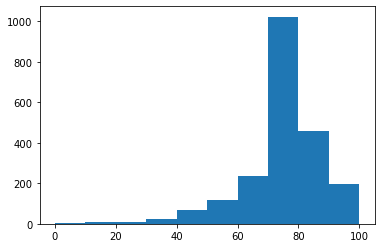

In [16]:
plt.hist(df[df.points_scored == 0].yards_to_go, bins=[0,10,20,30,40,50,60,70,80,90,100])
plt.plot()


[]

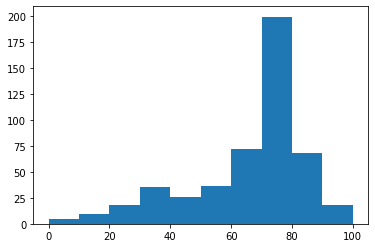

In [17]:
plt.hist(df[df.points_scored == 3].yards_to_go, bins=[0,10,20,30,40,50,60,70,80,90,100])
plt.plot()


[]

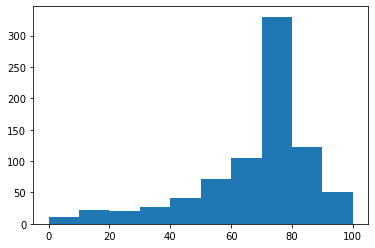

In [18]:
plt.hist(df[df.points_scored == 7].yards_to_go, bins=[0,10,20,30,40,50,60,70,80,90,100])
plt.plot()

In [37]:
def get_best_distribution(data):
    dist_names = ["alpha", "anglit", "arcsine", "argus", "beta", "betaprime", "bradford", "burr", "burr12", "cauchy","chi","chi2","cosine","crystalball","dgamma","dweibull","erlang","expon","exponnorm","exponweib","exponpow","f","fatiguelife","fisk","foldcauchy","foldnorm","genlogistic","gennorm","genpareto","genexpon","genextreme","gausshyper","gamma","gengamma","genhalflogistic","geninvgauss","gilbrat","gompertz","gumbel_r","gumbel_l","halfcauchy","halflogistic","halfnorm","halfgennorm","hypsecant","invgamma","invgauss","invweibull","johnsonsb","johnsonsu","kappa4","kappa3","ksone","laplace","logistic","loggamma","loglaplace","lognorm","loguniform","lomax","maxwell","mielke","moyal","nakagami","ncx2","ncf","nct","norm","norminvgauss","pareto","pearson3","powerlaw","powerlognorm","powernorm","rdist","rayleigh","rice","recipinvgauss","semicircular","skewnorm","t","triang","truncexpon","truncnorm","tukeylambda","uniform","vonmises","vonmises_line","wald","weibull_min","weibull_max","wrapcauchy"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)
        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))
    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value
    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]
get_best_distribution(100 - df[df.points_scored == 3].yards_to_go)

/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:496: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0/np.pi/np.sqrt(x*(1-x))
/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


p value for alpha = 5.3287505465937836e-64
p value for anglit = 6.867626135811098e-37
p value for arcsine = 9.094380850874078e-41
p value for argus = 3.4192370825558415e-68
p value for beta = 5.749457620359999e-13
p value for betaprime = 2.2361309123789692e-11
p value for bradford = 3.778700946015491e-19


/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:781: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:785: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),


p value for burr = 2.784871949501857e-11
p value for burr12 = 8.1099073350957e-12
p value for cauchy = 2.787260039145709e-20
p value for chi = 8.081359014729459e-16
p value for chi2 = 3.415169474467505e-13
p value for cosine = 5.333443537984671e-28
p value for crystalball = 1.0475192631106102e-19
p value for dgamma = 9.389249430907733e-09
p value for dweibull = 2.1249411962907997e-08


/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2958: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.1500000000000004.
  warnings.warn(
/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2958: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.1000000000000005.
  warnings.warn(
/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2958: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.2.
  warnings.warn(
/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2958: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.3000000000000007.
  warnings.warn(
/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_co

p value for erlang = 3.41547425687716e-13
p value for expon = 2.5500343891626564e-38
p value for exponnorm = 4.8524446652899795e-11
p value for exponweib = 1.3986876099920464e-11
p value for exponpow = 0.0
p value for f = 1.6078651803477666e-11
p value for fatiguelife = 3.4082224222244156e-12
p value for fisk = 5.7604147287818615e-11
p value for foldcauchy = 5.1571550886825376e-14
p value for foldnorm = 0.0
p value for genlogistic = 6.526844042119823e-14


/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1722: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


p value for gennorm = 1.7076072555359563e-36
p value for genpareto = 3.421141121370337e-21
p value for genexpon = 5.374680706363526e-37
p value for genextreme = 1.7499228607356597e-11
p value for gausshyper = 5.234160104945518e-13
p value for gamma = 3.4158520268383684e-13
p value for gengamma = 3.582165055633386e-12
p value for genhalflogistic = 1.3407774872579725e-15
p value for geninvgauss = 8.315606312617435e-13
p value for gilbrat = 7.254795293408841e-19
p value for gompertz = 0.0
p value for gumbel_r = 6.05270769586737e-14
p value for gumbel_l = 2.340917894993814e-15
p value for halfcauchy = 6.6569602603303e-24
p value for halflogistic = 6.510991367075663e-29
p value for halfnorm = 1.2765946641874955e-25
p value for halfgennorm = 9.446455542874822e-18
p value for hypsecant = 2.8668867063402633e-10
p value for invgamma = 1.4270433900896802e-11
p value for invgauss = 4.715713643542248e-12
p value for invweibull = 1.749612497372296e-11
p value for johnsonsb = 7.720213583939299e-12
p

/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:98: RuntimeWarning: floating point number truncated to an integer
  return -scu._smirnovp(n, x)
/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:101: RuntimeWarning: floating point number truncated to an integer
  return scu._smirnovc(n, x)


p value for loggamma = 1.2370750147076129e-18
p value for loglaplace = 7.714068796122052e-29
p value for lognorm = 1.395283484093539e-205


/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:4965: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)


p value for loguniform = 0.0
p value for lomax = 7.171814384892282e-44
p value for maxwell = 3.608480834118159e-20
p value for mielke = 1.8062156547033429e-10
p value for moyal = 6.143105778808394e-11
p value for nakagami = 8.081861929293058e-16
p value for ncx2 = 3.348558912984912e-22
p value for ncf = 2.613769732667145e-12
p value for nct = 2.835026076369358e-11
p value for norm = 1.0475219532595467e-19
p value for norminvgauss = 7.93853925147542e-12
p value for pareto = 4.257959730526206e-40
p value for pearson3 = 3.415095339399867e-13
p value for powerlaw = 1.5542228943839116e-37


/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:6413: RuntimeWarning: divide by zero encountered in power
  pow(_norm_cdf(-np.log(x)/s), c*1.0-1.0))
/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:6412: RuntimeWarning: invalid value encountered in multiply
  return (c/(x*s) * _norm_pdf(np.log(x)/s) *
/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:6413: RuntimeWarning: overflow encountered in power
  pow(_norm_cdf(-np.log(x)/s), c*1.0-1.0))


p value for powerlognorm = 8.282223337301228e-12
p value for powernorm = 2.284937320416074e-17
p value for rdist = 7.847685683756247e-20
p value for rayleigh = 2.8077982281895898e-15
p value for rice = 2.8079241419003913e-15
p value for recipinvgauss = 2.683104376238625e-12
p value for semicircular = 6.432412246280836e-52


/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:6809: RuntimeWarning: divide by zero encountered in log1p
  return np.log(2/np.pi) + 0.5*np.log1p(-x*x)


p value for skewnorm = 2.0086607897220805e-16
p value for t = 1.0497479702126966e-19
p value for triang = 9.92023791998251e-14
p value for truncexpon = 3.36439010073237e-23
p value for truncnorm = 0.0


/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:7738: RuntimeWarning: divide by zero encountered in power
  Px = Fx**(lam-1.0) + (np.asarray(1-Fx))**(lam-1.0)


p value for tukeylambda = 1.3353614982913298e-14
p value for uniform = 3.6657069268766725e-47
p value for vonmises = 0.0
p value for vonmises_line = 9.936620954921544e-14
p value for wald = 1.0207480101885607e-15
p value for weibull_min = 8.701780038639532e-258
p value for weibull_max = 0.0
p value for wrapcauchy = nan
Best fitting distribution: dweibull
Best p value: 2.1249411962907997e-08
Parameters for the best fit: (1.0540841922364255, 29.155566060462586, 14.12337332944212)


/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:700: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


('dweibull',
 2.1249411962907997e-08,
 (1.0540841922364255, 29.155566060462586, 14.12337332944212))

In [36]:
print(100 - df[df.points_scored == 3].yards_to_go )

0       76
12      25
14      36
18      26
19      25
        ..
3441    24
3442    25
3452    55
3454    23
3456    40
Name: yards_to_go, Length: 486, dtype: int64
